<a href="https://colab.research.google.com/github/srijanparia/Image_Classification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [30]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
def plot_sample(index):
  plt.figure(figsize =(10,1))
  plt.imshow(x_train[index])

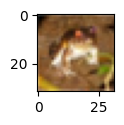

In [18]:
plot_sample(0)

In [19]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [26]:
def res_sample(index):
  print(classes[y_train[index][0]])

automobile


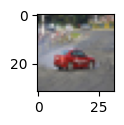

In [27]:
plot_sample(75)
res_sample(75)

In [28]:
res_sample(75)

automobile


In [31]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [33]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [34]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid'),
])

In [36]:
model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [39]:
model.fit(x_test_scaled, y_test_categorical, epochs = 50)

Epoch 1/50
313/313 [==============================] - 20s 63ms/step - loss: 0.5089 - accuracy: 0.8431
Epoch 2/50
313/313 [==============================] - 14s 45ms/step - loss: 0.4947 - accuracy: 0.8546
Epoch 3/50
313/313 [==============================] - 14s 45ms/step - loss: 0.4797 - accuracy: 0.8556
Epoch 4/50
313/313 [==============================] - 14s 44ms/step - loss: 0.4527 - accuracy: 0.8677
Epoch 5/50
313/313 [==============================] - 15s 48ms/step - loss: 0.4451 - accuracy: 0.8724
Epoch 6/50
313/313 [==============================] - 14s 46ms/step - loss: 0.4271 - accuracy: 0.8793
Epoch 7/50
313/313 [==============================] - 14s 45ms/step - loss: 0.4047 - accuracy: 0.8830
Epoch 8/50
313/313 [==============================] - 14s 44ms/step - loss: 0.3819 - accuracy: 0.8914
Epoch 9/50
313/313 [==============================] - 14s 45ms/step - loss: 0.3748 - accuracy: 0.8937
Epoch 10/50
313/313 [==============================] - 15s 47ms/step - loss: 0.373

In [41]:
y_predict = model.predict(x_test_scaled)

313/313 [==============================] - 5s 16ms/step


In [45]:
classes[np.argmax(y_predict[0])]

'cat'

In [49]:
classes[np.argmax(y_test_categorical[0])]

'cat'

In [50]:
model.evaluate(x_test_scaled, y_test_categorical)

313/313 [==============================] - 5s 16ms/step - loss: 0.1126 - accuracy: 0.9644


[0.11262884736061096, 0.9643999934196472]

In [51]:
y_predicted_labels = [ np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[3, 8, 8, 0, 6]

In [52]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [  70,    0,  929,    0,    1,    0,    0,    0,    0,    0],
       [   8,    0,    1,  989,    0,    0,    2,    0,    0,    0],
       [  36,    0,    1,    0,  963,    0,    0,    0,    0,    0],
       [   7,    0,    2,    0,    1,  990,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,  999,    0,    0,    0],
       [   8,    0,    0,    0,    0,    0,    0,  992,    0,    0],
       [ 217,    0,    0,    0,    0,    0,    0,    0,  783,    0],
       [   2,    0,    0,    0,    0,    0,    0,    0,    0,  998]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

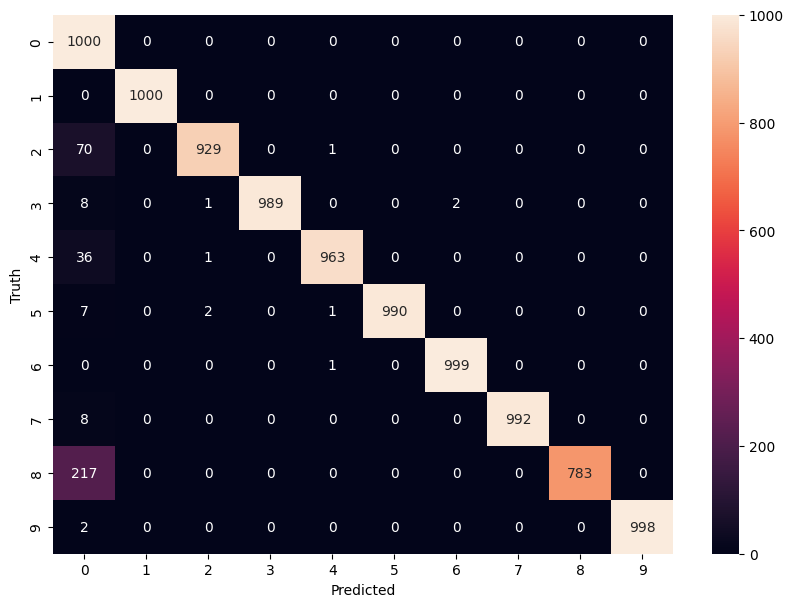

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
count = 0
for i in range(len(y_predict)):
  if y_predicted_labels[i] != y_test[i] and y_test[i] == 8:
    print(i)
    count += 1

print(count)

54
55
73
80
124
197
202
218
274
306
312
368
385
403
408
482
582
703
712
721
757
806
904
918
992
1004
1059
1111
1160
1164
1205
1216
1218
1223
1262
1263
1279
1294
1331
1447
1512
1532
1557
1676
1683
1691
1772
1778
1809
1856
1869
1874
1938
1946
2014
2021
2048
2118
2217
2223
2227
2456
2458
2533
2687
2705
2790
2837
2927
3078
3106
3108
3138
3206
3226
3270
3279
3331
3403
3423
3521
3537
3585
3698
3718
3813
3829
3842
3848
3870
3912
3950
3968
4024
4096
4115
4125
4165
4196
4198
4199
4242
4256
4280
4316
4317
4351
4385
4428
4512
4566
4585
4621
4649
4720
4735
4742
4870
4919
4944
5034
5110
5257
5325
5586
5619
5672
5747
5821
5946
5972
5989
6211
6238
6262
6285
6342
6366
6376
6379
6412
6424
6449
6463
6594
6691
6751
6831
6937
6950
6987
6997
7042
7060
7142
7185
7303
7320
7409
7414
7485
7503
7655
7688
7695
7832
7968
7995
8018
8067
8075
8117
8186
8269
8287
8290
8303
8377
8411
8418
8515
8531
8607
8676
8704
8717
8826
8834
8890
8913
9051
9054
9105
9176
9200
9206
9274
9291
9306
9347
9371
9389
9412
9451
9490
9491

In [63]:
def plot_sample(index):
  plt.figure(figsize =(10,1))
  plt.imshow(x_test[index])

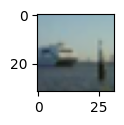

In [66]:
plot_sample(9929)

In [57]:
y_test[1][0]

8

In [58]:
y_predicted_labels[1]

8